In [488]:
import pandas as pd 
import numpy as np 
import os
import matplotlib
import pandas.plotting as pdp
from pandas import *
import matplotlib.pyplot as plt
import statsmodels
from scipy.stats import sem


#Define a generic function using Pandas replace function
def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded

In [2]:
os.chdir('C:\\Users\\ShaRo\\Downloads\\ml-1m')

In [3]:
#Data Loading

moviesDf = pd.read_csv('movies.dat', sep='::', engine='python', names = ['MovieID', 'Title', 'Genres'])
moviesDf['Genres'] = moviesDf['Genres'].apply(lambda x: x.split('|'))
moviesDf['Year'] = moviesDf['Title'].apply(lambda x: x[-5:-1])
moviesDf['Title'] = moviesDf['Title'].apply(lambda x: x[0:-7])
moviesDf=moviesDf.reindex(columns=['MovieID','Title','Year', 'Genres'])
moviesDf['Year'] = moviesDf['Year'].apply(pd.to_numeric)
moviesDf['Title'] = moviesDf['Title'].astype('category')
moviesDf['#Genres'] = moviesDf['Genres'].apply(lambda x: len(x))

usersDf = pd.read_csv('users.dat', sep='::', engine='python', names = ['UserID','Gender','Age','Occupation','Zip-code'])

ratingsDf = pd.read_csv('ratings.dat', sep='::', engine='python', names = ['UserID','MovieID','Rating','Timestamp'])
ratingsDf['Datetime'] = pd.to_datetime(ratingsDf['Timestamp'], unit='s')
ratingsDf = ratingsDf.drop(['Timestamp'], axis=1)
ratingsDf['Rating'] = ratingsDf['Rating'].apply(pd.to_numeric)

In [4]:
Occupation = {0:  "other"
,1:"academic/educator"
,2:"artist"
,3:"clerical/admin"
,4:"college/grad student"
,5:"customer service"
,6:"doctor/health care"
,7:"executive/managerial"
,8:"farmer"
,9:"homemaker"
,10:"K-12 student"
,11:"lawyer"
,12:"programmer"
,13:"retired"
,14:"sales/marketing"
,15:"scientist"
,16:"self-employed"
,17:"technician/engineer"
,18:"tradesman/craftsman"
,19:"unemployed"
,20:"writer"}

usersDf['Occupation'] = usersDf['Occupation'].apply(lambda x:Occupation[x])
usersDf['Occupation'] = usersDf['Occupation'].apply(lambda x: str(x))

In [5]:
moviesDf.head()

,MovieID,Title,Year,Genres,#Genres
0,1,Toy Story,1995,"[Animation, Children's, Comedy]",3
1,2,Jumanji,1995,"[Adventure, Children's, Fantasy]",3
2,3,Grumpier Old Men,1995,"[Comedy, Romance]",2
3,4,Waiting to Exhale,1995,"[Comedy, Drama]",2
4,5,Father of the Bride Part II,1995,[Comedy],1


In [6]:
usersDf.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,K-12 student,48067
1,2,M,56,self-employed,70072
2,3,M,25,scientist,55117
3,4,M,45,executive/managerial,02460
4,5,M,25,writer,55455


In [91]:
ratingsDf.head()

,UserID,MovieID,Rating,Datetime
0,1,1193,5,2000-12-31 22:12:40
1,1,661,3,2000-12-31 22:35:09
2,1,914,3,2000-12-31 22:32:48
3,1,3408,4,2000-12-31 22:04:35
4,1,2355,5,2001-01-06 23:38:11


In [19]:
moviesDf.describe()

,MovieID,Year,#Genres
count,3883.000000,3883.000000,3883.000000
mean,1986.049446,1986.066959,1.650270
std,1146.778349,16.895690,0.804589
min,1.000000,1919.000000,1.000000
25%,982.500000,1982.000000,1.000000
50%,2010.000000,1994.000000,1.000000
75%,2980.500000,1997.000000,2.000000
max,3952.000000,2000.000000,6.000000


In [87]:
usersDf.describe()

,UserID,Age
count,6040.000000,6040.000000
mean,3020.500000,30.639238
std,1743.742145,12.895962
min,1.000000,1.000000
25%,1510.750000,25.000000
50%,3020.500000,25.000000
75%,4530.250000,35.000000
max,6040.000000,56.000000


In [92]:
ratingsDf.describe()

,UserID,MovieID,Rating
count,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00
std,1.728413e+03,1.096041e+03,1.117102e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.506000e+03,1.030000e+03,3.000000e+00
50%,3.070000e+03,1.835000e+03,4.000000e+00
75%,4.476000e+03,2.770000e+03,4.000000e+00
max,6.040000e+03,3.952000e+03,5.000000e+00


In [7]:
#Missing Values:
moviesDf.isnull().values.any()

False

In [31]:
usersDf.isnull().values.any()

False

In [32]:
ratingsDf.isnull().values.any()

False

In [7]:
#Data Merging

ruDf = pd.merge(ratingsDf, usersDf, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True, copy=True, indicator=False, validate=None)

rmDf = pd.merge(ratingsDf, moviesDf, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True, copy=True, indicator=False, validate=None)

rmuDf = pd.merge(rmDf, usersDf, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True, copy=True, indicator=False, validate=None)

rmuDf = rmuDf.drop(['MovieID'], axis=1)

In [8]:
print('shape check:')
print(usersDf.shape)
print(moviesDf.shape)
print(ratingsDf.shape)
print(ruDf.shape)
print(rmDf.shape)
print(rmuDf.shape)

shape check:
(6040, 5)
(3883, 5)
(1000209, 4)
(1000209, 8)
(1000209, 8)
(1000209, 11)


In [9]:
#Data Analysis

rmuDf.corr()

,UserID,Rating,Year,#Genres,Age
UserID,1.000000,0.012303,-0.031795,0.002097,0.034688
Rating,0.012303,1.000000,-0.156946,0.001981,0.056869
Year,-0.031795,-0.156946,1.000000,0.002687,-0.165870
#Genres,0.002097,0.001981,0.002687,1.000000,-0.024078
Age,0.034688,0.056869,-0.165870,-0.024078,1.000000


In [23]:
rmuDf.cov()

,UserID,Rating,Year,#Genres,Age
UserID,2.987410e+06,23.755056,-788.569575,3.540806,704.593632
Rating,2.375506e+01,1.247917,-2.515792,0.002162,0.746581
Year,-7.885696e+02,-2.515792,205.903227,0.037661,-27.971110
#Genres,3.540806e+00,0.002162,0.037661,0.954227,-0.276417
Age,7.045936e+02,0.746581,-27.971110,-0.276417,138.109094


In [22]:
rmuDf.describe()

,UserID,Rating,Year,#Genres,Age
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,3.581564e+00,1.986698e+03,2.101376e+00,2.973831e+01
std,1.728413e+03,1.117102e+00,1.434933e+01,9.768456e-01,1.175198e+01
min,1.000000e+00,1.000000e+00,1.919000e+03,1.000000e+00,1.000000e+00
25%,1.506000e+03,3.000000e+00,1.982000e+03,1.000000e+00,2.500000e+01
50%,3.070000e+03,4.000000e+00,1.992000e+03,2.000000e+00,2.500000e+01
75%,4.476000e+03,4.000000e+00,1.997000e+03,3.000000e+00,3.500000e+01
max,6.040000e+03,5.000000e+00,2.000000e+03,6.000000e+00,5.600000e+01


We can notice that there is'nt a significant correlation / covariance between the numeric variables.
specificly, we'd look for rating variable and other explaining variables.

In [10]:
print("Number of Users Rated the Movie:")
table = pivot_table(rmuDf, values=["Rating"],index=["Title"], aggfunc=lambda x:len(x))

table.rename(index=str, columns={"Rating" :"#Rating"} ,inplace=True)
flattened = pd.DataFrame(table.to_records())
rm11Df = pd.merge(rmuDf, flattened, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True, copy=True, indicator=False, validate=None)
rm11Df.head()

rm11Df.corr()

Number of Users Rated the Movie:


,UserID,Rating,Year,#Genres,Age,#Rating
UserID,1.000000,0.012303,-0.031795,0.002097,0.034688,0.004333
Rating,0.012303,1.000000,-0.156946,0.001981,0.056869,0.253486
Year,-0.031795,-0.156946,1.000000,0.002687,-0.165870,0.082639
#Genres,0.002097,0.001981,0.002687,1.000000,-0.024078,0.361213
Age,0.034688,0.056869,-0.165870,-0.024078,1.000000,-0.023516
#Rating,0.004333,0.253486,0.082639,0.361213,-0.023516,1.000000


We can see the #Rating column does correlates, but not much, with the rating column.

# Time Analysis

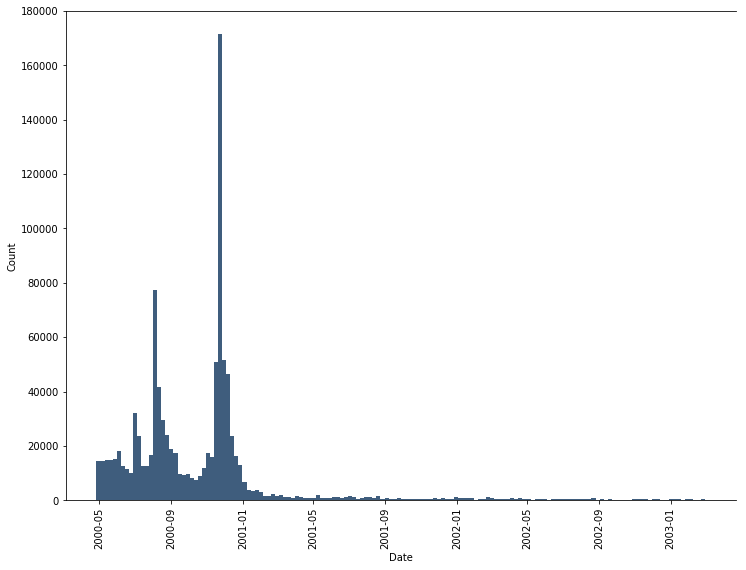

In [489]:
#Time Histogram

plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
plt.xticks(fontsize=10, rotation='vertical')
plt.xlabel("Date", fontsize=10)  
plt.ylabel("Count", fontsize=10)  
plt.hist(list(ratingsDf['Datetime']), color="#3F5D7D", bins=150);

this analysis shows us the distribution of instances across the timeline.
most of the ratings occured between May 2000 and Januray 2001. with 2 of 80k and 170k at August 2000 and December 2000.
this alone can't determine any seasonality, and we can't disqualify any dataset collection effects.

       average       std <lambda>
        Rating    Rating   Rating
Year                             
1919  3.466667  1.035725   0.0045
1920  3.666667  1.307725   0.0024
1921  3.790323  1.073329   0.0062
1922  3.991597  1.098490   0.0238
1923  3.117647  1.495090   0.0017


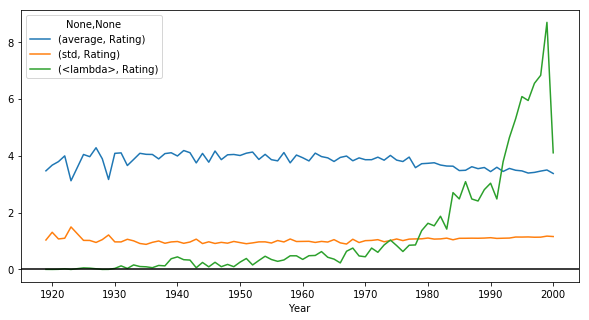

In [20]:
#Avg Rating over Years
# under the assumption that age distributes normally.
table = pivot_table(rmuDf, values=["Rating"],index=["Year"], aggfunc=[np.average,np.std,lambda x:len(x)/10000])
print(table.head())

table.plot(figsize = (10,5))
plt.axhline(0, color='k')

As we from the plots above, most of the ratings are between 5.2000 - 1.2001. we'd like to look for difference or effect in movies between those years' rating and others.

The second plot, which shows us statistics of average and standard deviation between rows in this date, together with a normalized count, helps us deduce there isn't any seasonality or trends we'd like to look further.

The next analysis focused on the distribution of genres across time.
We'd like to find any clues of influence to the ratings in Genres' choise in every year.

In [25]:
def explode(df, columns):
    idx = np.repeat(df.index, df[columns[0]].str.len())
    a = df.T.reindex_axis(columns).values
    concat = np.concatenate([np.concatenate(a[i]) for i in range(a.shape[0])])
    p = pd.DataFrame(concat.reshape(a.shape[0], -1).T, idx, columns)
    return pd.concat([df.drop(columns, axis=1), p], axis=1).reset_index(drop=True)

table = rmuDf.ix[:,["Year","Genres","Rating"]]
result = explode(table,['Genres'])
print("\n\nThere can be various amount of genres permutations in the Dataset:\n")
print(table.head())
print("\n\nIndividual - Genres' Pivot-Table:\n")
print(result.head())

mostFrequent = result.groupby('Year')['Genres'].agg(lambda x: x.value_counts().index[0])
print("\n\nMost frequently appeared genres choise in that year\n")
print (mostFrequent.tail())

C:\Users\ShaRo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  This is separate from the ipykernel package so we can avoid doing imports until




There can be various amount of genres permutations in the Dataset:

   Year                                     Genres  Rating
0  1995            [Animation, Children's, Comedy]       5
1  1995  [Animation, Children's, Musical, Romance]       5
2  1995                                    [Drama]       5
3  1977       [Action, Adventure, Fantasy, Sci-Fi]       4
4  1993                               [Drama, War]       5


Individual - Genres' Pivot-Table:

   Year  Rating      Genres
0  1995       5   Animation
1  1995       5  Children's
2  1995       5      Comedy
3  1995       5   Animation
4  1995       5  Children's


Most frequently appeared genres choise in that year

Year
1996     Drama
1997     Drama
1998    Comedy
1999    Comedy
2000    Comedy
Name: Genres, dtype: object



Remembering the distribution of the ratings across the timeline,there is'nt sufficient evidence to suggest an apparent effect in the number of unique genres choosen that year. Although we can notice the growing number of choosen unique genres, a growing diversity might mean bigger variation in rating, that we'd like to look further


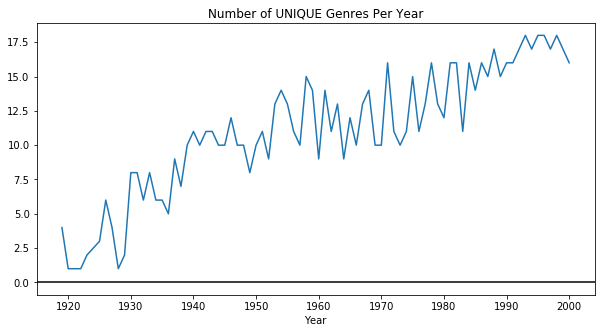

In [215]:
result3 = result.groupby('Year')['Genres'].nunique()
result3.sort_index().plot(figsize = (10,5), title = "Number of UNIQUE Genres Per Year")
plt.axhline(0, color='k')
print("\nRemembering the distribution of the ratings across the timeline,\
there is'nt sufficient evidence to suggest an apparent effect in the number of unique genres choosen that year.\
 Although we can notice the growing number of choosen unique genres, a growing diversity might mean bigger \
variation in rating, that we'd like to look further")

In [36]:
result.head()

,Year,Rating,Genres
0,1995,5,Animation
1,1995,5,Children's
2,1995,5,Comedy
3,1995,5,Animation
4,1995,5,Children's


In [54]:
result4 = pivot_table(result, values=["Rating"],index=["Year", "Genres"], aggfunc=[np.average,np.std])
print("Pivot: statistics of Ratings across year and genres")
print("\n\n")
print(result4.head())
print(result4.tail(20))

Pivot: statistics of Ratings across year and genres



                 average       std
                  Rating    Rating
Year Genres                       
1919 Action     2.500000  1.914854
     Adventure  2.666667  1.154701
     Comedy     3.631579  0.851741
     Drama      2.571429  1.511858
1920 Comedy     3.666667  1.307725
                   average       std
                    Rating    Rating
Year Genres                         
1999 Sci-Fi       3.415543  1.267885
     Thriller     3.504038  1.170505
     War          3.592618  1.101371
     Western      2.158537  1.065205
2000 Action       3.465275  1.121372
     Adventure    3.066234  1.135449
     Animation    3.388091  1.197111
     Children's   3.284507  1.268955
     Comedy       3.400387  1.161864
     Crime        3.159375  1.060748
     Documentary  3.523697  1.156684
     Drama        3.625823  1.114327
     Fantasy      2.414815  1.161479
     Horror       2.876956  1.201943
     Musical      3.820000  1.251170

In [60]:
result.head()

,Year,Rating,Genres
0,1995,5,Animation
1,1995,5,Children's
2,1995,5,Comedy
3,1995,5,Animation
4,1995,5,Children's


In [164]:
result5 = result.groupby(['Year','Genres']).size().groupby('Year').agg(np.std)
result6 = result5.reset_index()
result6.columns = ['Year','std Rating']
print(result6.tail(15))

    Year    std Rating
66  1986   3849.434675
67  1987   3989.801693
68  1988   2932.830044
69  1989   4016.369722
70  1990   3894.436831
71  1991   3237.485098
72  1992   4614.997427
73  1993   5586.315065
74  1994   6784.508949
75  1995   7646.772961
76  1996   6944.244752
77  1997   8268.647656
78  1998   8245.154381
79  1999  10729.081554
80  2000   5188.137455


C:\Users\ShaRo\Anaconda3\lib\site-packages\pandas\core\generic.py:2530: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Counts of Ratings Per Year:

    Year  Rating
76  1996  129816
77  1997  150755
78  1998  147028
79  1999  155212
80  2000   73706

std of Ratings Per Year:

    Year  std-avgRating among genres
76  1996                 6944.244752
77  1997                 8268.647656
78  1998                 8245.154381
79  1999                10729.081554
80  2000                 5188.137455
    Year  ratingsCount  std-avgRating among genres
76  1996        129816                 6944.244752
77  1997        150755                 8268.647656
78  1998        147028                 8245.154381
79  1999        155212                10729.081554
80  2000         73706                 5188.137455

Correlation calc: 

                                Year  ratingsCount  std-avgRating among genres
Year                        1.000000      0.769334                    0.780713
ratingsCount                0.769334      1.000000                    0.992067
std-avgRating among genres  0.780713      0.992067      

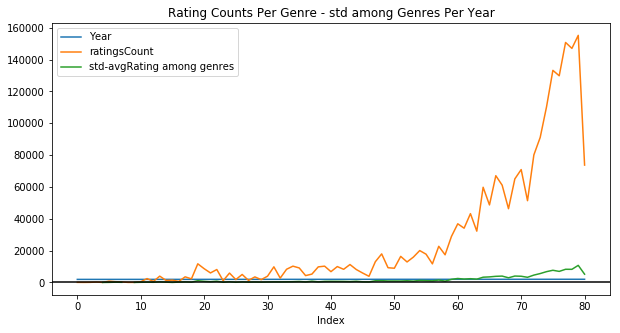

In [264]:
result7 = result.groupby(['Year','Genres']).agg(['count']).reset_index()
result8 = result.groupby(['Year','Genres']).agg([np.average]).reset_index()
#result7['Year-Genres'] = result7['Year'].map(str) +'-'+ result7['Genres']

result7 = result7.drop(['Genres'], axis=1)
result8 = result7.drop(['Genres'], axis=1)
result7.columns = result8.columns.get_level_values(0)
result8.columns = result8.columns.get_level_values(0)
result8 = result8.groupby(['Year']).agg(['std'])
result8.columns = result8.columns.get_level_values(0)

result7 = result7.groupby(['Year']).agg(['sum'])

result7.columns = result7.columns.get_level_values(0)

result7 = result7.reset_index()
result8 = result8.reset_index()
print('Counts of Ratings Per Year:\n')
print(result7.tail())
result7.columns = ['Year', 'ratingsCount']
result8.columns = ['Year', 'std-avgRating among genres']
print('\nstd of Ratings Per Year:\n')
print(result8.tail())

result9 = pd.merge(result7 ,result8, on='Year')
print(result9.tail())
ax = result9.plot(figsize = (10,5), title = "Rating Counts Per Genre - std among Genres Per Year")
plt.axhline(0, color='k')
ax.set_xlabel("Index")

print ("\nCorrelation calc: \n")
print(result9.corr())

print("\nPutting side by side the graph of standard deviation of average rating per genre in a year and the number of ratings \
and calculating it's correlation can explain the variation in average rating across genres, and by this we eliminate the effect of genres in the dataset.\
\nBy this we'll choose to deduce there isn't any significant effect in genres-years variables")

In [9]:
print ("Most Rated Genres Frequencies by Year")
mostFrequent.value_counts()

Most Rated Genres Frequencies by Year


Comedy       29
Drama        20
Thriller      6
Sci-Fi        6
Musical       4
Horror        4
Action        4
War           3
Romance       3
Film-Noir     1
Western       1
Name: Genres, dtype: int64

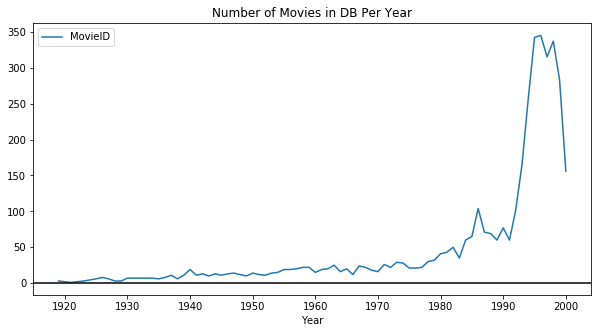

In [10]:
table = pivot_table(moviesDf, values=["MovieID"],index=["Year"], aggfunc=lambda x:len(x))
table.sort_index().plot(figsize = (10,5), title = "Number of Movies in DB Per Year")
plt.axhline(0, color='k')

C:\Users\ShaRo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  


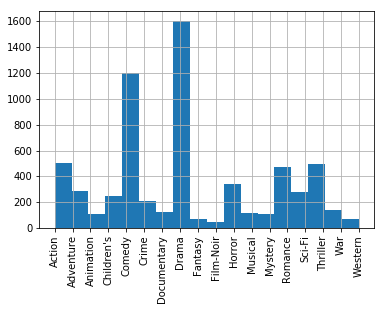

In [59]:
#Genre Histogram
table = moviesDf.ix[:,["MovieID","Genres"]]
table = explode(table,['Genres'])
g = table["Genres"].hist(bins = table["Genres"].nunique())
for tick in g.get_xticklabels():
        tick.set_rotation(90)

# Age Analysis

count of Users:
Age
1      222
18    1103
25    2096
35    1193
45     550
50     496
56     380
Name: UserID, dtype: int64
The average Age of user is: 30.6 and variance: 166.31


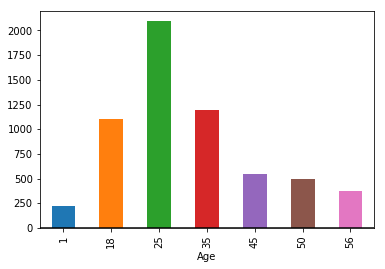

In [284]:
agePivot = usersDf.groupby('Age', as_index=True).count()
print('count of Users:')
print(agePivot['UserID'])
print("The average Age of user is: "+str('{0:.3g}'.format(usersDf['Age'].mean()))+" and variance: "+str('{0:.5g}'.format(usersDf['Age'].var())))
print("We'd like to look further for Age analysis: average and var of ratings in each age category")

agePivot['UserID'].plot.bar()
plt.axhline(0, color='k')

    median   average       var <lambda>
    Rating    Rating    Rating   Rating
Age                                    
1        4  3.549520  1.460273    27211
18       4  3.507573  1.359487   183536
25       4  3.545235  1.270523   395556
35       4  3.618162  1.162301   199003
45       4  3.638062  1.135045    83633


       median    average         var <lambda>
          Age        Age         Age      Age
Rating                                       
1          25  27.411756  128.277750    56174
2          25  28.607603  124.861820   107557
3          25  29.730035  132.977441   261197
4          25  30.154405  138.629708   348971
5          25  30.221130  149.516306   226310

Since the median is stable across all age group we can't identify a age-rating abnormalziations


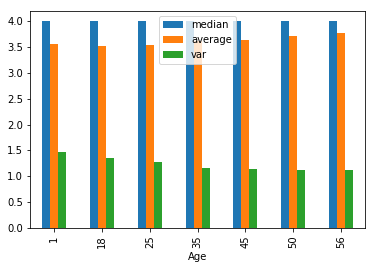

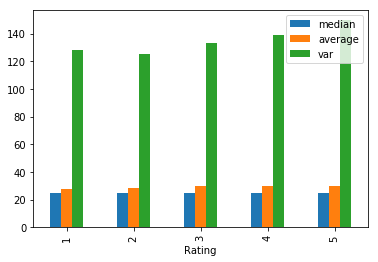

In [322]:
table = pivot_table(rmuDf, values=["Rating"],index=["Age"], aggfunc=[np.median,np.average,np.var,lambda x:len(x)])
print(table.head())
table.columns = table.columns.get_level_values(0)
#print(table.columns)
table.drop(['<lambda>'], axis=1).plot.bar()

table = pivot_table(rmuDf, values=["Age"],index=["Rating"], aggfunc=[np.median, np.average,np.var,lambda x:len(x)])
print('\n')
print(table.head())
table.columns = table.columns.get_level_values(0)
table.drop(['<lambda>'], axis=1).plot.bar()

#scipy.stats.ttest_rel(rmuDf['average'], cat2['values'])
print("\nSince the median is stable across all age group we can't identify a age-rating abnormalziations")

# Occupation Analysis

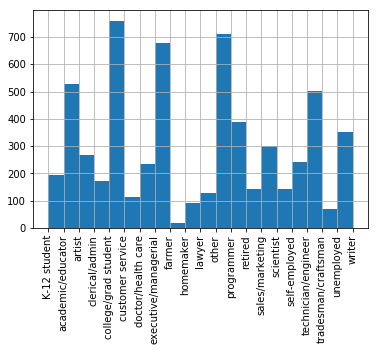

In [114]:
#Occupation Histogram:

g = usersDf['Occupation'].hist(bins=20)
for tick in g.get_xticklabels():
        tick.set_rotation(90)

                     median      average                 std          
Gender                    F  M         F         M         F         M
Occupation                                                            
K-12 student              4  4  3.572390  3.515668  1.219128  1.226690
academic/educator         4  4  3.584606  3.571737  1.096987  1.113907
artist                    4  4  3.555888  3.581192  1.135429  1.141182
clerical/admin            4  4  3.687679  3.630709  1.134697  1.064627
college/grad student      4  4  3.547252  3.533348  1.149373  1.170720
customer service          4  4  3.584891  3.527222  1.123531  1.090196
doctor/health care        4  4  3.690834  3.641861  1.066529  1.137345
executive/managerial      4  4  3.668559  3.585641  1.040461  1.091821
farmer                    3  4  3.363208  3.498551  1.196517  1.071060
homemaker                 4  4  3.668467  3.498104  1.038397  0.951845
lawyer                    4  4  3.796822  3.590904  0.982414  1.168869
other 

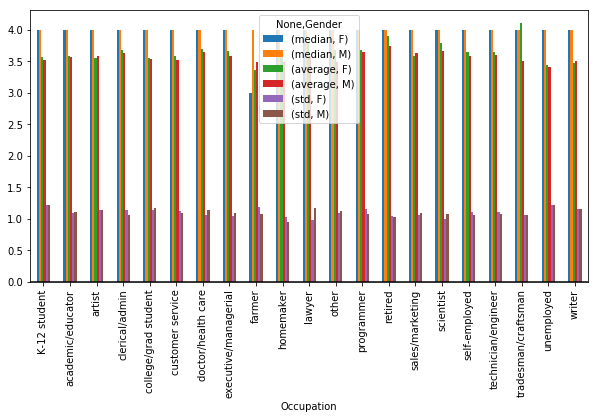

In [323]:
# Checking for Difference of Rating among Occupation:
# under the assumption that age distributes normally.
table = pd.crosstab(rmuDf['Occupation'],rmuDf['Gender'], values=rmuDf['Rating'], aggfunc=[np.median, np.average, np.std])
table.sort_values(list(table.columns.values), ascending=False)

print(table)

table.plot.bar(figsize = (10,5))
plt.axhline(0, color='k')

# Gender Analysis

Differentiating Gender:

Gender
F    1709
M    4331
Name: UserID, dtype: int64

there are as much as 2.5 times male indentified users than female indentified users.

Gender
F    246440
M    753769
Name: UserID, dtype: int64

there are as much as 3 times male records than female records.


We will try to see whether we should treat them differently and whether a further analysis is needed:
      if male and female rate differently.

The total variance between female and male (summed for all movies) is 379.84

 which in the meaning of ratings, is not much and we further deduce to keep them intact.


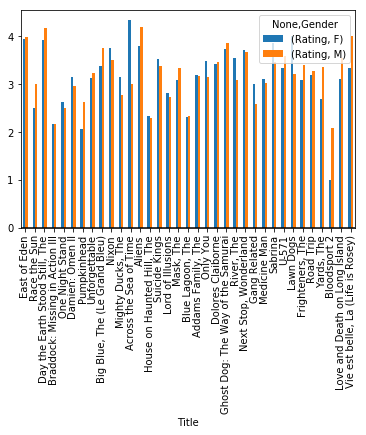

In [350]:
print('Differentiating Gender:\n')
genderPivot = usersDf.groupby('Gender', as_index=True).count()['UserID']
print(genderPivot)
print('\nthere are as much as 2.5 times male indentified users than female indentified users.\n')
genderPivot2 = rmuDf.groupby('Gender', as_index=True).count()['UserID']
print(genderPivot2)
print('\nthere are as much as 3 times male records than female records.\n')

print('\nWe will try to see whether we should treat them differently and whether a further analysis is needed:\n\
      if male and female rate differently.\n')
table = pivot_table(rmuDf, values=["Rating"],index=['Title'], columns=["Gender"], aggfunc=np.average)
table.sample(35).plot.bar()
plt.axhline(0, color='k')

table2 = table.var(axis=1).sum()
print("The total variance between female and male (summed for all movies) is "+str('{0:.5g}'.format(table2)))
print("\n which in the meaning of ratings, is not much and we further deduce to keep them intact.")

In order to understand the effect of rating over Gender & Age we'll use cross-tabulation:

In [352]:
pd.crosstab(rmuDf['Age'],rmuDf['Gender'], values=rmuDf['Rating'], aggfunc=[np.average,np.var,np.median])

average                 var           median   
Gender         F         M         F         M      F  M
Age                                                     
1       3.616291  3.517461  1.421638  1.475733      4  4
18      3.453145  3.525476  1.386013  1.349477      4  4
25      3.606700  3.526780  1.223389  1.283204      4  4
35      3.659653  3.604434  1.159832  1.162368      4  4
45      3.663044  3.627942  1.149968  1.128665      4  4
50      3.797110  3.687098  1.068339  1.142844      4  4
56      3.915534  3.720327  1.074513  1.136960      4  4

It can be inferred that:<br>
1)female users tend to rate higher for all age groups (with little significane).<br>
2)the first age category's variance is higher for both male and female.<br>
3) 50 - 56 and 56+ age categories average - rating is higher.

In [374]:
from scipy.stats import ttest_ind

cat1 = rmuDf[rmuDf['Age']==1]
cat2 = rmuDf[rmuDf['Age']!=1]

print("We'll use T-test to determine if two sets of data are significantly different from each other:\n1-18 Age olds' rating and the others:\
      \nA small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.\n")

print(ttest_ind(cat1['Rating'], cat2['Rating']))

We'll use T-test to determine if two sets of data are significantly different from each other:
1-18 Age olds' rating and the others:      
A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.

Ttest_indResult(statistic=-4.797565488357478, pvalue=1.6062879372412817e-06)


Lastly, checking the minimum and maximum values of the distribution of ratings:


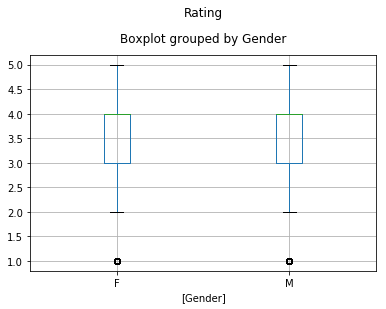

In [376]:
print("Lastly, checking the minimum and maximum values of the distribution of ratings:")
plt = rmuDf.boxplot(column='Rating', by = ['Gender'])
ttl = plt.title
ttl.set_position([.5, 1.15])

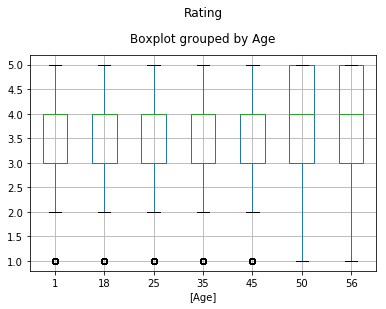

In [375]:
plt = rmuDf.boxplot(column='Rating', by = ['Age'])
ttl = plt.title
ttl.set_position([.5, 1.15])

As seen before, although the median doesn't change, people of age tend to rate generously.

# Movies Analysis

<bound method NDFrame.head of                                                      average  <lambda>  \
Title                                                                    
Reluctant Debutante, The                            3.181818      11.0   
Sour Grapes                                         2.727273      11.0   
Miss Julie                                          2.727273      11.0   
Hard Core Logo                                      3.727273      11.0   
Twin Town                                           2.818182      11.0   
Saragossa Manuscript, The (Rekopis znaleziony w...  3.272727      11.0   
Unhook the Stars                                    3.272727      11.0   
Flying Saucer, The                                  3.090909      11.0   
Arguing the World                                   3.909091      11.0   
Losing Chase                                        3.636364      11.0   
Glass Shield, The                                   3.000000      11.0   
Voyage o

Text(0,0.5,'movie average rating')

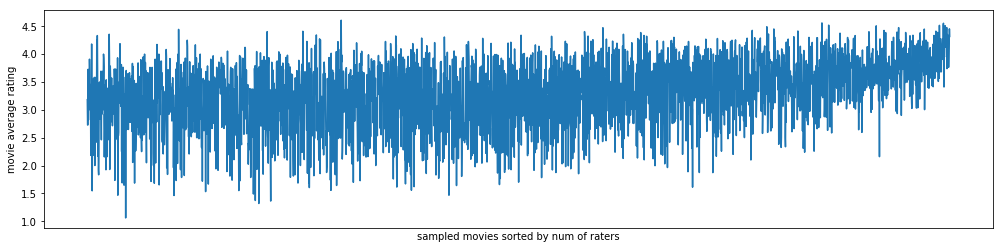

In [470]:
# number of users to rate a movie
table = pivot_table(rmuDf, values=["Rating"],index=["Title"], aggfunc=[np.average,lambda x:len(x), np.var, np.median]).dropna()
table.columns = table.columns.get_level_values(0)
#top 90% percentile movies - dropping 10% of the movies with least number of ratings
table = table[table['<lambda>']> table['<lambda>'].quantile(0.1)]
print(table.sort_values(by='<lambda>').head)
plot1 = table.sort_values(by='<lambda>').drop(['<lambda>'], axis=1)['average'].plot(figsize=(17,4))
print("from the plot we recognize 2 sets of movies, by average rating, \n \
low rating and high rating movies, so we'll try to differentiate them and look further. \n \
the premise behind is there are some extraordinary movies with higher than average rating and they behave differently.")
plot1.axes.get_xaxis().set_ticks([])
plot1.axes.set_xlabel('sampled movies sorted by num of raters')
plot1.axes.set_ylabel('movie average rating')

Text(0,0.5,'movie var rating')

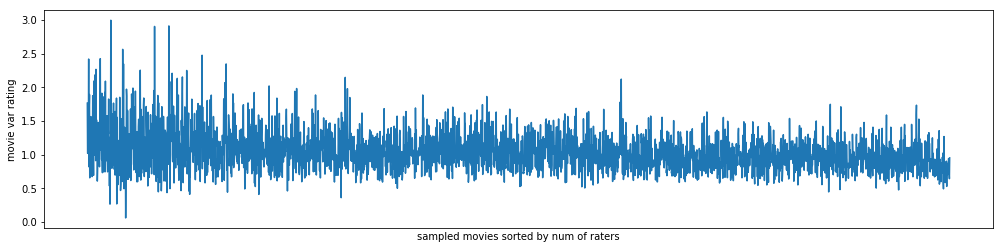

In [469]:
plot2 = table.sort_values(by='<lambda>').drop(['<lambda>'], axis=1)['var'].plot(figsize=(17,4))
plot2.axes.get_xaxis().set_ticks([])
plot2.axes.set_xlabel('sampled movies sorted by num of raters')
plot2.axes.set_ylabel('movie var rating')

Text(0,0.5,'movie median rating')

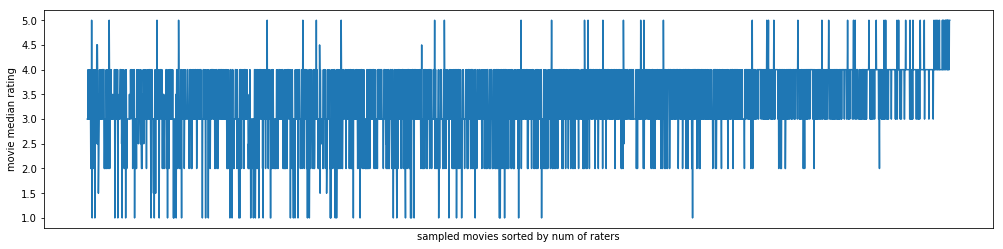

In [471]:
plot3 = table.sort_values(by='<lambda>').drop(['<lambda>'], axis=1)['median'].plot(figsize=(17,4))
plot3.axes.get_xaxis().set_ticks([])
plot3.axes.set_xlabel('sampled movies sorted by num of raters')
plot3.axes.set_ylabel('movie median rating')

In [480]:
table['c'] = pd.qcut(table['average'], 7, labels=list(range(7)))
#print(tableH.to_frame())
#tableC = pd.merge(table,tableH.to_frame(), how='inner')
print(table.groupby('c').agg(np.average))
#print(table[table['c']=='low'])

    average    <lambda>       var    median
c                                          
0  2.223362  124.549234  1.141877  2.076586
1  2.785359  166.539474  1.200565  2.982456
2  3.113718  233.366228  1.145082  3.017544
3  3.358167  281.046053  1.047850  3.282895
4  3.587493  340.813596  1.011777  3.972588
5  3.807317  407.712719  0.929716  3.998904
6  4.123985  633.527352  0.798393  4.131291


Analyzing the 3 plots and table, we can see a clear trend: as number of raters rises, higher the rating.

In [485]:
print("distance of rating's timestamp-datetime from movie's year")
#table = pd.concat([pd.to_datetime(rmuDf['Datetime'] - (pd.to_datetime(rmuDf['Year'], format='%Y')+pd.Timedelta(182.5, unit='d'))), rmuDf['Rating']], axis=1)
table = rmuDf
table['dateDist'] = pd.to_datetime(rmuDf['Datetime'] - (pd.to_datetime(rmuDf['Year'], format='%Y')+pd.Timedelta(182.5, unit='d')))
#table.columns = ['dateDist','Rating']
table['dateDist'] = table['dateDist'].values.astype(np.int64)
table.corr()

distance of rating's timestamp-datetime from movie's year


,UserID,Rating,Year,#Genres,Age,dateDist
UserID,1.000000,0.012303,-0.031795,0.002097,0.034688,0.018641
Rating,0.012303,1.000000,-0.156946,0.001981,0.056869,0.156285
Year,-0.031795,-0.156946,1.000000,0.002687,-0.165870,-0.999640
#Genres,0.002097,0.001981,0.002687,1.000000,-0.024078,-0.003851
Age,0.034688,0.056869,-0.165870,-0.024078,1.000000,0.164197
dateDist,0.018641,0.156285,-0.999640,-0.003851,0.164197,1.000000


As we can see there is some correlation between rating the distance between rating's timestamp and movie's date.